In [3]:
import os
output_path = "/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/PhD(my_PC)/PhD(output_files)/GPR/240625_understanding_noise_and_length_scale/GPR_with_noise"

Again as done previously, let us consider the tranlated function $$f(x)=x*sin(x)+1$$, with noise and lets try predicting using GPR.

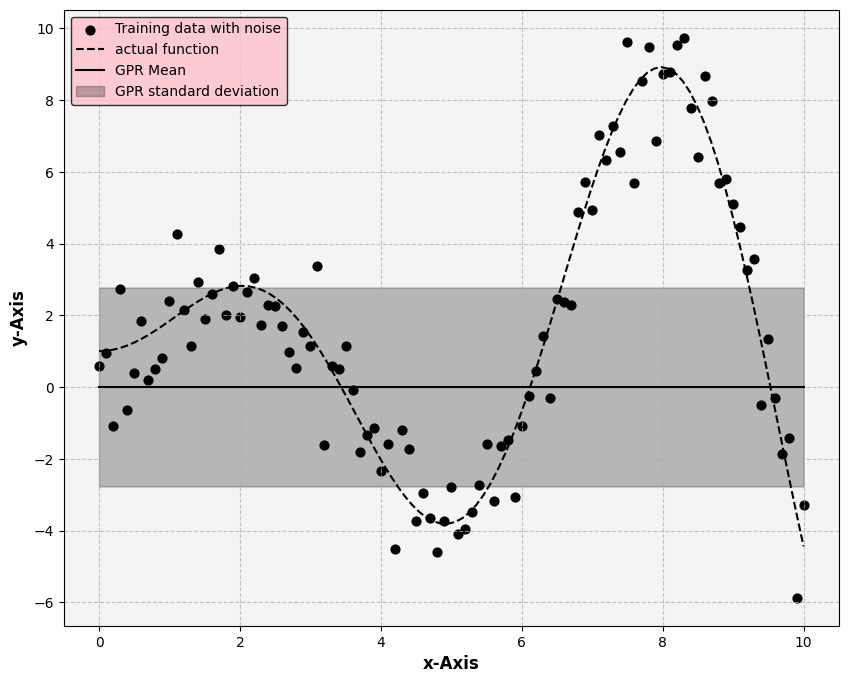

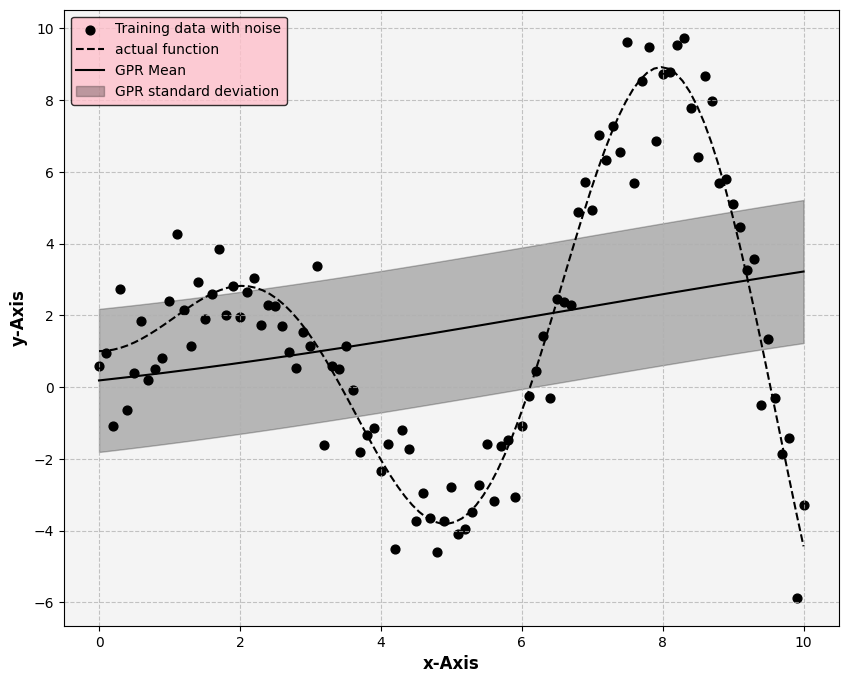

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Defining my function
def my_func(x):
    c=1
    y = x*np.sin(x)+c
    return y

# Lets define a function to plot kernels, mean, standard deviation from the GPR
def plot_func(GPRmodel,x_train):
    n_samples = 5
    x_plot_gpr = np.linspace(min(x_train), max(x_train), 1000)
    x_plot_gpr_scaled = scaler.transform(x_plot_gpr.reshape(-1,1))
    y_plot_gpr = GPRmodel.sample_y(x_plot_gpr_scaled,n_samples)
    y_mean,y_std = GPRmodel.predict(x_plot_gpr_scaled,return_std=True)
    
    ## plotting
    fig, axs = plt.subplots(1,1,figsize=(10,8))
    axs.set_title("")
    axs.set_xlabel("x-Axis", fontweight="bold", fontsize=12)
    axs.set_ylabel("y-Axis", fontweight="bold", fontsize=12)
    
    axs.scatter(x_train, y_train, c="black",s=40, label = "Training data with noise")
    axs.plot(x_plot, y_plot, "k--", label= "actual function")
    #axs.plot(x_plot_gpr,y_plot_gpr, alpha = 0.25)
    axs.plot(x_plot_gpr,y_mean,"k-",label="GPR Mean")
    axs.fill_between(x_plot_gpr, 
                     y_mean+1.96*y_std,
                     y_mean-1.96*y_std, 
                     color = "black",
                    alpha = 0.25, label = "GPR standard deviation")
    
    axs.grid("on", alpha=0.75, linestyle="--")
    axs.set_facecolor("#f4f4f4")
    axs.legend(loc="best", facecolor="pink", edgecolor="black")
    
    return fig
    
#number of training data 
n_train = 101

# defining noise
np.random.seed(2)
epsilon = np.random.normal(loc=0, scale=1, size=n_train)

# Defining the training data
x_train = np.linspace(0,10,n_train)
y_train = my_func(x_train) + epsilon

# Defining the data to plot
x_plot = np.linspace(0,10,100)
y_plot = my_func(x_plot)

# scaling the data 
scaler = MinMaxScaler()
scaler.fit(x_train.reshape(-1,1))
x_train_scaled = scaler.transform(x_train.reshape(-1,1))

# Defining Kernel function
kernel = RBF(length_scale = 1.32, length_scale_bounds=[1e-2,1e2] ) + WhiteKernel(noise_level=1, noise_level_bounds=[1e-2,1e2])
kernel_no_noise = RBF(length_scale = 1, length_scale_bounds=[1e-2,1e2])

# Defining GPR untrained model
gpr_model_untrained = GPR(kernel=kernel, n_restarts_optimizer=10, optimizer=None, random_state=0)
fig_untrained = plot_func(gpr_model_untrained,x_train)
#GPR model untrained no noise


# Defining GPR trained model
gpr_model_trained = GPR(kernel=kernel, n_restarts_optimizer=10, optimizer=None, random_state=0)
gpr_model_trained.fit(x_train_scaled,y_train)
fig_trained = plot_func(gpr_model_trained,x_train)
# Plotting the training data along with the actual function


In [56]:
file_name = "3_standard_example_21_ls_13200e4.pdf"
file_name = os.path.join(output_path,file_name)
fig_trained.savefig(file_name)

In [63]:
np.random.normal?